In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import nltk

%matplotlib inline
# nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\iconex\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\iconex\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\iconex\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\iconex\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\brown.zip.
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\iconex\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\iconex\AppData\Roaming\nltk_data...


[nltk_data]    |   Unzipping corpora\pros_cons.zip.
[nltk_data]    | Downloading package qc to
[nltk_data]    |     C:\Users\iconex\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\qc.zip.
[nltk_data]    | Downloading package reuters to
[nltk_data]    |     C:\Users\iconex\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package rte to
[nltk_data]    |     C:\Users\iconex\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\rte.zip.
[nltk_data]    | Downloading package semcor to
[nltk_data]    |     C:\Users\iconex\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package senseval to
[nltk_data]    |     C:\Users\iconex\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\senseval.zip.
[nltk_data]    | Downloading package sentiwordnet to
[nltk_data]    |     C:\Users\iconex\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\sentiwordnet.zip.
[nltk_data]    | Downloading package sentence_polarity to
[nltk_data]  

[nltk_data]    |   Unzipping misc\perluniprops.zip.
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\iconex\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\nonbreaking_prefixes.zip.
[nltk_data]    | Downloading package vader_lexicon to
[nltk_data]    |     C:\Users\iconex\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package porter_test to
[nltk_data]    |     C:\Users\iconex\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping stemmers\porter_test.zip.
[nltk_data]    | Downloading package wmt15_eval to
[nltk_data]    |     C:\Users\iconex\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping models\wmt15_eval.zip.
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\iconex\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping misc\mwa_ppdb.zip.
[nltk_data]    | 
[nltk_data]  Done downloading collection all


True

### Carregando os dados

In [2]:
dataset = pd.read_csv('data/imdb-reviews.csv')
dataset

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg
...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos


### Analisando e tratando os dados

In [3]:
dataset['sentiment'].value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

In [4]:
dataset['_sentiment'] = dataset['sentiment'].apply(lambda x: 1 if x == 'pos' else 0 )
dataset

,id,text_en,text_pt,sentiment,_sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [5]:
# Creating Bag of Words
vectorizer = CountVectorizer(max_features=100)
bag_of_words = vectorizer.fit_transform(dataset['text_pt'])

bag_of_words.shape

(49459, 100)

### Criando Word Clouds
Para visualização das palavras com maior destaque

In [6]:
# separando o dataset por análises positivas e negativas
positives = dataset.query('_sentiment == 0')
negatives = dataset.query('_sentiment == 1')

# Juntando todos os textos em uma única lista
positive_words = ' '.join([ text for text in positives['text_pt'] ])
negative_words = ' '.join([ text for text in negatives['text_pt'] ])

<strong>Positive Cloud</strong>

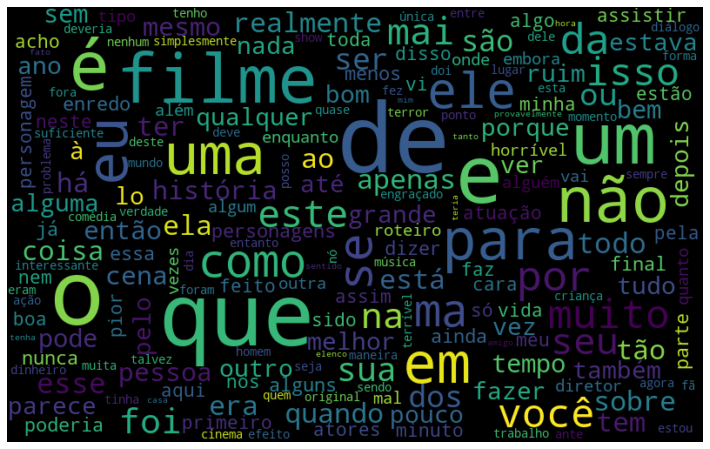

In [7]:
pos_cloud = WordCloud(width=800, height=500, 
                      max_font_size=110, collocations=False).generate(positive_words)

plt.figure(figsize=(16,8))
plt.imshow(pos_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<strong>Negative Cloud</strong>

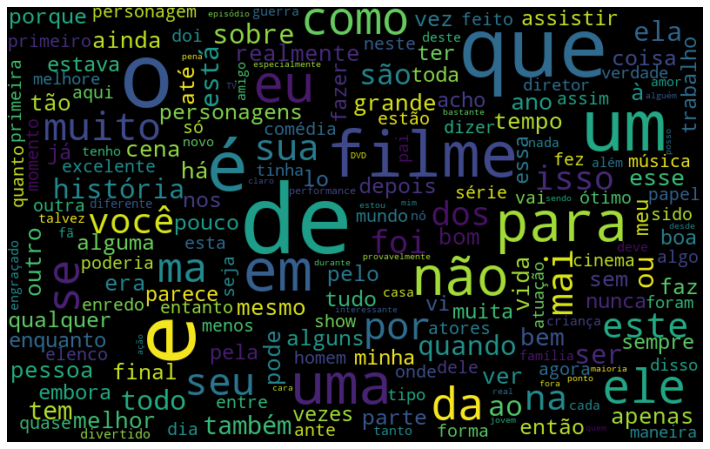

In [8]:
neg_cloud = WordCloud(width=800, height=500, 
                      max_font_size=110, collocations=False).generate(negative_words)

plt.figure(figsize=(16,8))
plt.imshow(neg_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Tokenização

In [11]:
# Criando instância de um whitespace tokenizer
wht_tokenizer = nltk.tokenize.WhitespaceTokenizer()

# Criando corpus textual com todas as plavras do dataset e gerando os tokens
all_words = ' '.join([positive_words, negative_words])
word_tokens = wht_tokenizer.tokenize(all_words)

# Medindo a frequência de cada palavra no corpus
frequency = nltk.FreqDist(word_tokens)

In [17]:
# Criando DataFrame das frequências
frequency_df = pd.DataFrame({'word': frequency.keys(), 'freq': frequency.values()})
frequency_df.head()

,word,freq
0,Mais,1538
1,uma,130888
2,"vez,",1927
3,o,244881
4,Sr.,1741


In [18]:
# Visualizando palavraas coom maior frequência
frequency_df.nlargest(columns='freq', n=20)

,word,freq
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


Podemos perceber que <em>as palavras mais frequentes não adicionam muito valor ao texto.</em> 

### Criando modelo

In [9]:
# Separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    bag_of_words, dataset['_sentiment'], test_size=0.33, random_state=42
)

In [10]:
# Criando, treinando e testando acurácia do modelo 
model = LogisticRegression()
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
accuracy

0.7127802965322877